In [1]:
# Import the model
import tensorflow as tf
from tensorflow import keras
from keras.applications.resnet50 import ResNet50
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
# Import helper function
import sys
sys.path.append('..')
from image_utils import image_from_file

In [4]:
original_image_full_path = 'frogimg.jpg'
x = image_from_file(original_image_full_path, [224,224])

(?, ?, ?)
Re-scaling image to  [224, 224]


In [5]:
our_model = ResNet50(weights='imagenet', include_top=True)













102858752/102853048 [==============================] - 1s 0us/step


40960/35363 [==================================] - 0s 0us/step
Prediction for image:  tailed_frog


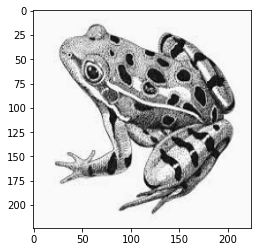

In [6]:
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import decode_predictions

x_preds = our_model.predict(np.expand_dims(preprocess_input(x), 0))
y = np.argmax(x_preds)
y_name = decode_predictions(x_preds, top=1)[0][0][1]
print("Prediction for image: ", y_name)

plt.imshow(x)

In [0]:
preprocessing = (np.array([103.939, 116.779, 123.68]), 1)

In [0]:
x_bgr = x[..., ::-1]

In [9]:
!pip install foolbox

     |████████████████████████████████| 1.9MB 3.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 460kB 25.5MB/s 
     |████████████████████████████████| 71kB 11.5MB/s 
  Created wheel for foolbox: filename=foolbox-2.4.0-cp36-none-any.whl size=1926223 sha256=9a3f4e6cfd70c428bd4812a65b431fd25347886f08ff47f2e72db7892938ec31
  Stored in directory: /root/.cache/pip/wheels/ae/5a/11/a5b42761c70dd38c674d889f6ce7edc9867d0262f95de8712b
Successfully built foolbox


In [0]:
import foolbox

# Temporary using Keras Model to get around bug that looks like: 
# https://github.com/bethgelab/foolbox/issues/164 
fmodel = foolbox.models.KerasModel(our_model, bounds=(0, 255), 
                                   preprocessing=preprocessing)
#fmodel = foolbox.models.TensorFlowModel.from_keras(model, 
#                                                   bounds=(0, 255), 
#  

In [0]:
attack_criterion = foolbox.criteria.Misclassification()

In [0]:
attack = foolbox.attacks.SaliencyMapAttack(fmodel, criterion=attack_criterion)

In [18]:
x_adv = attack(input_or_adv = x_bgr,
               label = y,
               unpack = False)

TypeError: ignored